In [14]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [15]:
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
    
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

In [16]:
# Note you can import os and use os.sep instead of forward slashes to make the import platform agnostic
#
# import os
#with open('data' + os.sep + 'accidents.csv') as f:
#    df=pd.read_csv(f, delimiter=';')

with open('data/accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')

## Exercise 2 (30 min):

In [17]:
dfEx2 = df.copy()
dfEx2

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [18]:
# These are the same commands
dfEx2["DATE"]
dfEx2.DATE

0         09/26/2018
1         09/25/2018
2         08/22/2019
3         09/23/2018
4         08/20/2019
             ...    
238517    01/20/2018
238518    01/04/2018
238519    01/20/2018
238520    01/29/2018
238521    01/23/2018
Name: DATE, Length: 238522, dtype: object

In [19]:
dfEx2.DATE = pd.to_datetime(dfEx2.DATE)
dfEx2

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-09-26,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,2018-09-25,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,2019-08-22,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,2018-09-23,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-20,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,2018-01-20,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,2018-01-04,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,2018-01-20,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,2018-01-29,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [20]:
dfEx2.DATE = dfEx2.DATE.dt.to_period("M")
dfEx2

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-09,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,2018-09,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,2019-08,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,2018-09,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,2018-01,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,2018-01,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,2018-01,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,2018-01,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [21]:
groupingByDate = dfEx2.groupby(dfEx2.DATE)
countOfGroupByDate = groupingByDate.count()
countOfGroupByDate

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01,11735,11735,11732,11438,11438,7754,11735,11735,11735,11735,...,9575,612,115,35,11735,11633,8520,553,107,35
2018-02,10395,10395,10393,10109,10109,6865,10395,10395,10395,10395,...,8556,561,133,45,10395,10286,7657,518,123,44
2018-03,12519,12519,12515,12165,12165,8080,12519,12519,12519,12519,...,10345,632,131,30,12519,12430,9302,582,128,28
2018-04,11679,11679,11677,11300,11300,7555,11679,11679,11679,11679,...,9797,610,146,45,11679,11608,8777,560,136,42
2018-05,13438,13438,13433,12974,12974,8705,13438,13438,13438,13438,...,11385,729,155,39,13438,13360,10515,696,147,34
2018-06,13314,13314,13312,12903,12903,8518,13314,13314,13314,13314,...,11286,707,164,48,13314,13232,10526,677,155,46
2018-07,12787,12787,12784,12390,12390,8111,12787,12787,12787,12787,...,10788,724,168,39,12787,12717,9984,678,161,38
2018-08,12644,12644,12643,12252,12252,8046,12644,12644,12644,12644,...,10655,629,120,40,12644,12562,9794,588,115,38
2018-09,12425,12425,12419,12049,12049,8012,12425,12425,12425,12425,...,10469,701,145,39,12425,12360,9752,655,135,32


In [22]:
countOfGroupByDate['COLLISION_ID']

DATE
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, Name: COLLISION_ID, dtype: int64

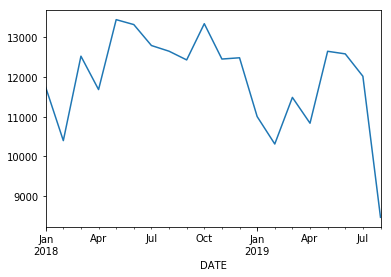

In [23]:
countOfGroupByDate['COLLISION_ID'].plot()

## Exercise 9 (45 min):

In [26]:
dfEx9 = df.copy()

# Low key this is not what I'd recommend in a business setting, but it illustrates the same as the following single line:
# frames=[df[column].reset_index().rename(columns={column:'FACTOR'}) for column in columns]

contributingFactorDf1 = dfEx9["CONTRIBUTING FACTOR VEHICLE 1"].reset_index()
contributingFactorDf1 = contributingFactorDf1.rename(columns = {"CONTRIBUTING FACTOR VEHICLE 1" : "FACTOR"})

contributingFactorDf2 = dfEx9["CONTRIBUTING FACTOR VEHICLE 2"].reset_index()
contributingFactorDf2 = contributingFactorDf2.rename(columns = {"CONTRIBUTING FACTOR VEHICLE 2" : "FACTOR"})

contributingFactorDf3 = dfEx9["CONTRIBUTING FACTOR VEHICLE 3"].reset_index()
contributingFactorDf3 = contributingFactorDf3.rename(columns = {"CONTRIBUTING FACTOR VEHICLE 3" : "FACTOR"})

contributingFactorDf4 = dfEx9["CONTRIBUTING FACTOR VEHICLE 4"].reset_index()
contributingFactorDf4 = contributingFactorDf4.rename(columns = {"CONTRIBUTING FACTOR VEHICLE 4" : "FACTOR"})

contributingFactorDf5 = dfEx9["CONTRIBUTING FACTOR VEHICLE 5"].reset_index()
contributingFactorDf5 = contributingFactorDf5.rename(columns = {"CONTRIBUTING FACTOR VEHICLE 5" : "FACTOR"})
contributingFactorDf1

,index,FACTOR
0,0,Unspecified
1,1,Unspecified
2,2,Unspecified
3,3,Driver Inattention/Distraction
4,4,View Obstructed/Limited
...,...,...
238517,238517,Driver Inattention/Distraction
238518,238518,Pavement Slippery
238519,238519,Unsafe Lane Changing
238520,238520,Failure to Yield Right-of-Way


In [27]:
factorsDf=pd.concat([contributingFactorDf1,
                     contributingFactorDf2,
                     contributingFactorDf3,
                     contributingFactorDf4,
                     contributingFactorDf5])
factorsDf

,index,FACTOR
0,0,Unspecified
1,1,Unspecified
2,2,Unspecified
3,3,Driver Inattention/Distraction
4,4,View Obstructed/Limited
...,...,...
238517,238517,NaN
238518,238518,NaN
238519,238519,NaN
238520,238520,NaN


In [28]:
noRepFactorsSize = factorsDf.groupby(['index','FACTOR']).size()
noRepFactorsSize

index   FACTOR                        
0       Unspecified                       1
1       Unspecified                       1
2       Unspecified                       1
3       Driver Inattention/Distraction    1
        Unspecified                       1
                                         ..
238519  Unspecified                       1
238520  Failure to Yield Right-of-Way     1
        Unspecified                       1
238521  Following Too Closely             1
        Passing or Lane Usage Improper    1
Length: 384278, dtype: int64

In [29]:
noRepFactorsSizeReset = noRepFactorsSize.reset_index()
noRepFactorsSizeReset

,index,FACTOR,0
0,0,Unspecified,1
1,1,Unspecified,1
2,2,Unspecified,1
3,3,Driver Inattention/Distraction,1
4,3,Unspecified,1
...,...,...,...
384273,238519,Unspecified,1
384274,238520,Failure to Yield Right-of-Way,1
384275,238520,Unspecified,1
384276,238521,Following Too Closely,1


In [30]:
finalDf = noRepFactorsSizeReset.groupby(['FACTOR']).size()
finalDf

FACTOR
Accelerator Defective                                       143
Aggressive Driving/Road Rage                               1095
Alcohol Involvement                                        2491
Animals Action                                              183
Backing Unsafely                                          14835
Brakes Defective                                            840
Cell Phone (hand-Held)                                       94
Cell Phone (hands-free)                                      12
Driver Inattention/Distraction                            61752
Driver Inexperience                                        4152
Driverless/Runaway Vehicle                                  241
Drugs (illegal)                                             118
Eating or Drinking                                           16
Failure to Keep Right                                       357
Failure to Yield Right-of-Way                             19641
Fatigued/Drowsy                  

In [31]:
finalDf = finalDf.sort_values(ascending=False).reset_index()
finalDf.head(6)

,FACTOR,0
0,Unspecified,190096
1,Driver Inattention/Distraction,61752
2,Failure to Yield Right-of-Way,19641
3,Following Too Closely,17293
4,Backing Unsafely,14835
5,Passing Too Closely,12631
